In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data

## Import

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [4]:
X = dataset.iloc[:,:-1].values
X.shape

(50, 4)

In [5]:
y = dataset.iloc[:,-1].values
y.shape

(50,)

## Handling missing data

In [6]:
dataset[dataset.isna().sum(axis=1)>0]

,R&D Spend,Administration,Marketing Spend,State,Profit


## Data encoding

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
X[:5,:]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [9]:
# Encoding independent categorical variables
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],
                       remainder='passthrough')
X = ct.fit_transform(X)
X[:5,:]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [10]:
ct.get_feature_names_out()

array(['encoder__x3_California', 'encoder__x3_Florida',
       'encoder__x3_New York', 'remainder__x0', 'remainder__x1',
       'remainder__x2'], dtype=object)

## Train-test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
for i in [X_train, X_test, y_train, y_test]: print(i.shape)

(40, 6)
(10, 6)
(40,)
(10,)


# Training

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

In [17]:
regressor.fit(X_train, y_train)

LinearRegression()

# Predict

In [18]:
y_pred = regressor.predict(X_test)

In [33]:
y_test_v = y_test[:,None]
y_pred_v = y_pred[:,None]
y_diff = y_test_v - y_pred_v
pd.DataFrame(np.concatenate([y_test_v, y_pred_v, y_diff, y_diff/y_test_v],axis=1),columns=['Test','Pred','Diff','Pct Diff'])

,Test,Pred,Diff,Pct Diff
0,103282.38,103015.201598,267.178402,0.002587
1,144259.40,132582.277608,11677.122392,0.080945
2,146121.95,132447.738452,13674.211548,0.093581
3,77798.83,71976.098513,5822.731487,0.074843
4,191050.39,178537.482211,12512.907789,0.065495
5,105008.31,116161.242302,-11152.932302,-0.106210
6,81229.06,67851.692097,13377.367903,0.164687
7,97483.56,98791.733747,-1308.173747,-0.013419
8,110352.25,113969.435330,-3617.185330,-0.032779
9,166187.94,167921.065696,-1733.125696,-0.010429


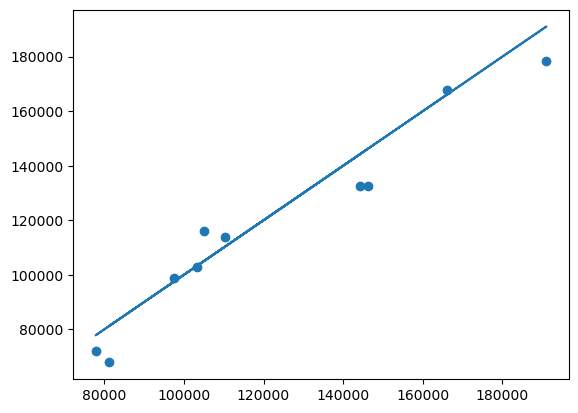

In [38]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)